Loading the data (Data Wrangling)

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# Specify the URL to the dataset
data_url = 'https://raw.githubusercontent.com/sravanipullayagari/ML/refs/heads/main/netflix_titles.csv'

# Try reading the CSV with different encodings
try:
    df = pd.read_csv(data_url, encoding='ISO-8859-1')  # Try with ISO-8859-1
    print(df.head())
except UnicodeDecodeError as e:
    print("Error reading the file:", e)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Season

printing the first 100 rows 

In [152]:
df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are few columns which are named as unamed and are with missing values so we are dropping those columns 

In [155]:
# Data Preprocessing
columns_to_drop = ['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25']  # Replace with actual column names
df_dropped = df.drop(columns=columns_to_drop, errors='ignore')
# Display the new DataFrame shape after dropping columns
print("New DataFrame shape after dropping columns:", df_dropped.shape)

New DataFrame shape after dropping columns: (8809, 12)


In [157]:
df_dropped.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


In [159]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [161]:
 null_values = df_dropped.isnull().sum()
print(null_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [163]:
df_dropped_bfilled = df_dropped.fillna(method='bfill')

In [165]:
# Check for null values in the original DataFrame
null_counts_original = df_dropped.isnull().sum()
print("Null values in the original DataFrame:")
print(null_counts_original)

Null values in the original DataFrame:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [167]:
# Check for null values in the filled DataFrame
null_counts_bfilled = df_dropped_bfilled.isnull().sum()
print("\nNull values in the filled DataFrame:")
print(null_counts_bfilled)



Null values in the filled DataFrame:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


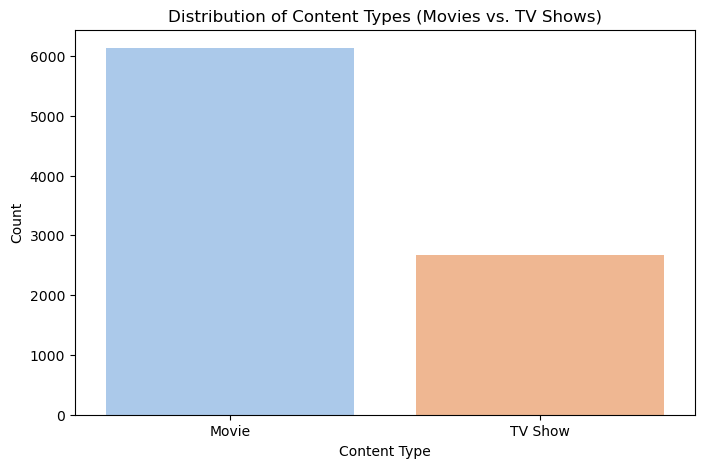

In [169]:
##Distribution of Content Types (Movies vs. TV Shows)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Distribution of Content Types (Movies vs. TV Shows)")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


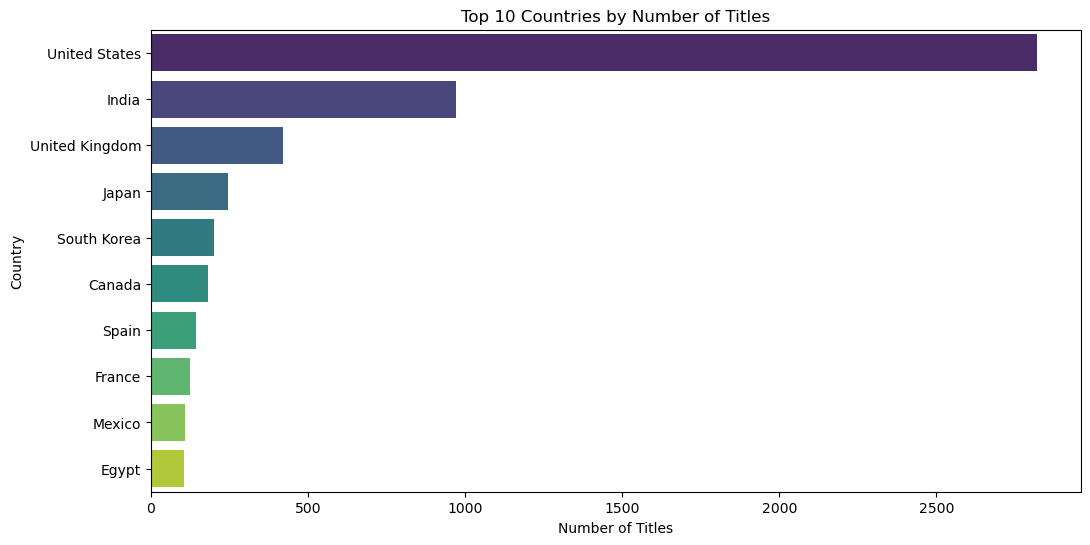

In [171]:
##Top 10 Most Frequent Countries of Content Production
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

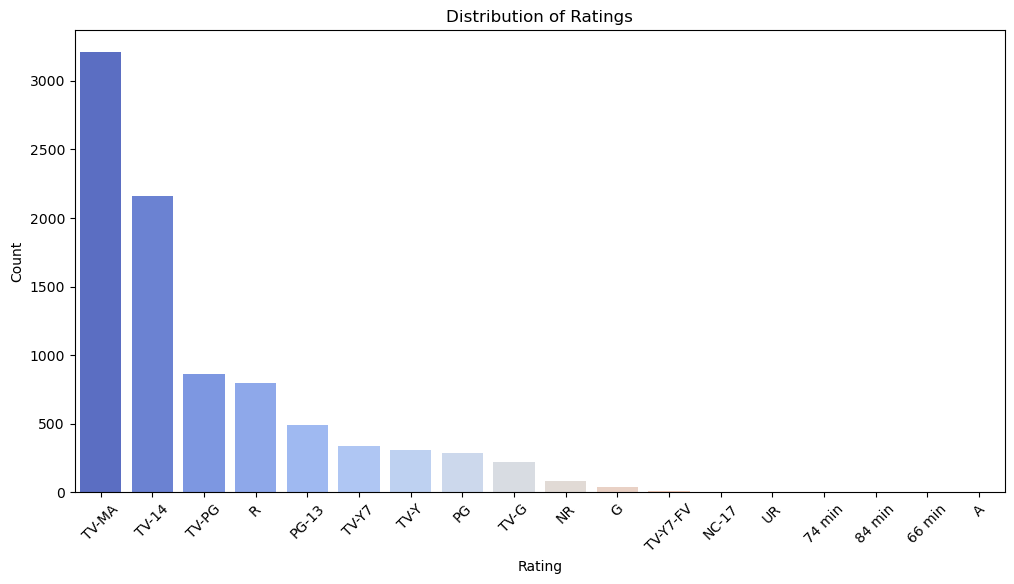

In [173]:
## Distribution of Ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

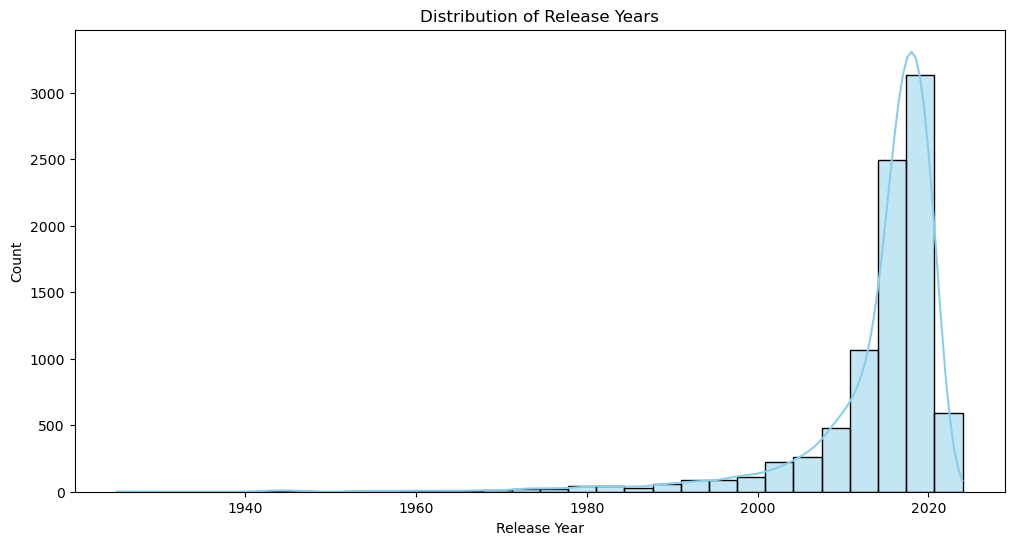

In [175]:
##Distribution of Release Years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

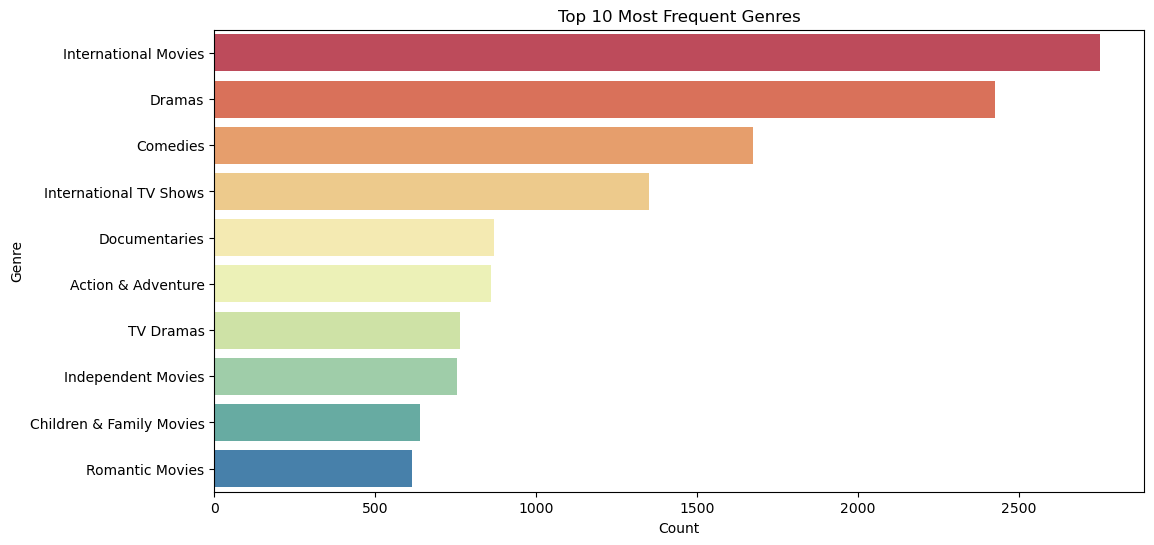

In [177]:
# Analysis of Top 10 Genres
# Create a DataFrame for genres by splitting and counting
genre_counts = df['listed_in'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Spectral')
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

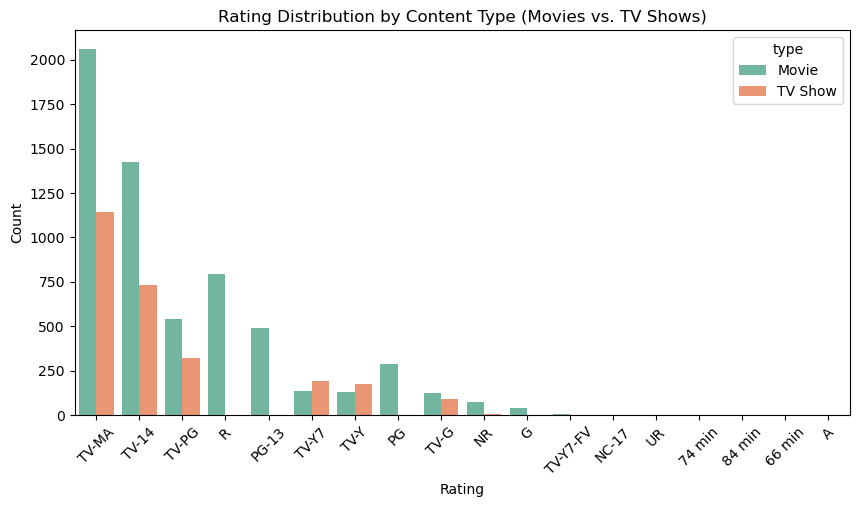

In [179]:
# Relationship between Content Type and Rating
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', hue='type', palette='Set2', order=df['rating'].value_counts().index)
plt.title("Rating Distribution by Content Type (Movies vs. TV Shows)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [181]:
# Data Preprocessing
# Handle missing values in necessary columns
df['listed_in'] = df['listed_in'].fillna('')
df['rating'] = df['rating'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')


Data Preprocessing: Reads the data, drops unwanted columns, and fills missing values.
Feature Selection: Uses CountVectorizer to convert listed_in into genre columns and encodes type and rating.
Genre Popularity Analysis: Summing genre columns provides a simple measure of popularity per title.


In [184]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report

In [186]:
# For simplicity, let’s define "popular" genres as the top 10 most frequent genres
genres_df = df['listed_in'].str.get_dummies(sep=', ')
top_genres = genres_df.sum().sort_values(ascending=False).head(10).index
df['popular'] = genres_df[top_genres].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)  # 1 for popular, 0 for not

# Encode categorical features for model input
type_encoder = LabelEncoder()
rating_encoder = LabelEncoder()
df['type_encoded'] = type_encoder.fit_transform(df['type'])
df['rating_encoded'] = rating_encoder.fit_transform(df['rating'])

# Prepare the final feature matrix and target variable
X = df[['type_encoded', 'rating_encoded']]
X = pd.concat([X, genres_df[top_genres]], axis=1)  # Add top genres as features
y = df['popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [188]:
logistic_model = LogisticRegression()

# Train and evaluate Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

r_squa = r2_score(y_test, y_pred_logistic)
n = X_test.shape[0]  
p = X_test.shape[1]  

# Calculate Adjusted R-squared
adjusted_r_squa = 1 - (1 - r_squa) * (n - 1) / (n - p - 1)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("R-squared:", r_squa)
print("Adjusted R-squared:", adjusted_r_squa)
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic)) 
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Metrics:
Accuracy: 0.9977298524404086
Precision: 1.0
R-squared: 0.9858894661501346
Adjusted R-squared: 0.985792652881868
Recall: 0.9971570717839374
F1 Score: 0.9985765124555159
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       355
           1       1.00      1.00      1.00      1407

    accuracy                           1.00      1762
   macro avg       0.99      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



In [190]:
random_forest_model = RandomForestClassifier()

# Train and evaluate Random Forest Classifier
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

r_squared = r2_score(y_test, y_pred_rf)
n = X_test.shape[0]  
p = X_test.shape[1] 

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Evaluate  models with accuracy, precision, recall, and classification report
print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
R-squared: 1.0
Adjusted R-squared: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00      1407

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



In [192]:
# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squard = r2_score(y_test, y_pred)
n = len(y)  # Number of observations
p = X.shape[1]  # Number of features
adjusted_r_squard = 1 - (1 - r_squard) * (n - 1) / (n - p - 1)


print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squard)
print("Adjusted R-squared:", adjusted_r_squard)


Linear Regression Metrics:
Mean Squared Error (MSE): 0.04503949590989925
Root Mean Squared Error (RMSE): 0.2122251066907477
R-squared: 0.7200484484224885
Adjusted R-squared: 0.7196665227041017


Model and Metrics: Fits a linear regression model to predict genre popularity and calculates R-squared and adjusted R-squared.

In [195]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for Random Forest hyperparameter tuning
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                                      n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Fit the randomized search to the data
rf_random_search.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print("Best hyperparameters for Random Forest:", rf_random_search.best_params_)

# Evaluate with tuned hyperparameters
best_rf_model = rf_random_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Performance metrics
print("Accuracy (tuned RF):", accuracy_score(y_test, y_pred_rf_tuned))
print("Precision (tuned RF):", precision_score(y_test, y_pred_rf_tuned))
print("Recall (tuned RF):", recall_score(y_test, y_pred_rf_tuned))
print("F1 Score (tuned RF):", f1_score(y_test, y_pred_rf_tuned))



Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}
Accuracy (tuned RF): 1.0
Precision (tuned RF): 1.0
Recall (tuned RF): 1.0
F1 Score (tuned RF): 1.0
